# World GDP Growth
### Mijia Li   4/15/2020

## Introduction

In this project, I imported three datasets GDP, Metadata, and Countries. I downloaded the GDP and Metadata dataset in the World Bank Group and they are the dataset about the world annual GDP growth. For the Countries dataset, I found it online and create a "Country Code" column by myself. The Countries dataset is about Coutries GDP and some related factors. I will be focusing on the average GDP growth from 2000 to 2018 in different countries. 

### Load libraries

In [88]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

### Table overview

In [31]:
GDP = pd.read_csv('/Users/mijia/Desktop/Spring 2020/BANA 8090/API_NY/API_NY.GDP.csv', skiprows=4)
Metadata = pd.read_csv('/Users/mijia/Desktop/Spring 2020/BANA 8090/API_NY/Metadata_Country.csv')
# Create a dataset myself to work with other data I found online (I created a 'Country Code' Column)
Countries = pd.read_csv('Desktop/Spring 2020/BANA 8090/API_NY/countries of the world.csv', decimal=',')

In [32]:
GDP.shape

(264, 65)

In [33]:
Metadata.shape

(263, 6)

#### Why there are 264 rows in GDP and 263 rows in Metadata?

In [34]:
Metadata['Code_from_GDP']=GDP['Country Code']
Metadata.loc[Metadata['Code_from_GDP']!=Metadata['Country Code']]

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5,Code_from_GDP
108,IRL,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Ireland,NaN,INX
109,IRN,Middle East & North Africa,Upper middle income,Fiscal year end: March 20; reporting period fo...,"Iran, Islamic Rep.",NaN,IRL
110,IRQ,Middle East & North Africa,Upper middle income,NaN,Iraq,NaN,IRN
111,ISL,Europe & Central Asia,High income,NaN,Iceland,NaN,IRQ
112,ISR,Middle East & North Africa,High income,NaN,Israel,NaN,ISL
...,...,...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN,WSM
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN,XKX
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN,YEM
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN,ZAF


#### Above result tell us the country code is defferent from row 108.

In [35]:
GDP.loc[108,'Country Name']

'Not classified'

#### Join the two datasets besed on the country code of Metadata dataset since there is a 'Not classified' name in GDP dataset.

In [36]:
print('GDP', list(GDP.columns), end='\n\n')
print('Metadata', list(Metadata.columns), end='\n\n')
# What columns are in both?
print('Common', [col for col in GDP.columns if col in Metadata.columns], end='\n\n')

GDP ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64']

Metadata ['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName', 'Unnamed: 5', 'Code_from_GDP']

Common ['Country Code']



In [37]:
Merged_data = pd.merge(GDP, Metadata, on='Country Code', how='right')

In [38]:
print('number of missing data in the merged dataset:')
print(Merged_data.isnull().sum())
Merged_data.describe(include='all')

number of missing data in the merged dataset:
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              263
                 ... 
IncomeGroup        46
SpecialNotes      170
TableName           0
Unnamed: 5        263
Code_from_GDP       0
Length: 71, dtype: int64


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2017,2018,2019,Unnamed: 64,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5,Code_from_GDP
count,263,263,263,263,0.0,124.000000,126.000000,126.000000,126.000000,126.000000,...,249.000000,240.000000,0.0,0.0,217,217,93,263,0.0,263
unique,263,263,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7,4,79,263,NaN,263
top,Puerto Rico,EUU,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Europe & Central Asia,High income,Fiscal year end: March 31; reporting period fo...,Puerto Rico,NaN,EUU
freq,1,1,263,263,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58,79,7,1,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,3.644668,5.081057,4.968986,6.238422,5.278660,...,3.148303,3.046500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5.795563,4.657354,5.168560,4.532576,4.409341,...,3.740326,3.127632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-27.270000,-19.685042,-12.278657,-12.464993,-12.481834,...,-15.671409,-19.621453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.862511,3.338560,3.275570,4.463894,3.107122,...,1.801182,1.936544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.450967,4.949110,5.332558,6.540973,5.289736,...,3.145544,3.095997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,6.322939,6.750247,7.220964,7.919351,7.160117,...,4.675792,4.650984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
print('number of missing data in Countries dataset:')
print(Countries.isnull().sum())
Countries.describe(include='all')

number of missing data in Countries dataset:
Country                                0
Country Code                           0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


,Country,Country Code,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,...,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bahrain,ITA,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,...,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,...,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,...,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,...,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,...,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,...,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


#### Join the merged dataset and countries dataset called Countries_AverageGDP_Growth.

In [40]:
Countries_AverageGDP_Growth = pd.merge(Merged_data, Countries, on='Country Code', how='right')

In [41]:
print('number of missing data in Countries_AverageGDP_Growth dataset:')
print(Countries_AverageGDP_Growth.isnull().sum())
Countries_AverageGDP_Growth.describe(include='all')

number of missing data in Countries_AverageGDP_Growth dataset:
Country Name       18
Country Code        0
Indicator Name     18
Indicator Code     18
1960              227
                 ... 
Birthrate           3
Deathrate           4
Agriculture        15
Industry           16
Service            15
Length: 91, dtype: int64


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,209,227,209,209,0.0,93.000000,95.000000,95.000000,95.000000,95.000000,...,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,209,227,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Puerto Rico,GBR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,209,209,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.093308,5.231863,4.910755,6.058120,5.339936,...,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,NaN,NaN,NaN,6.199730,5.276313,5.896932,5.128066,4.925573,...,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,NaN,NaN,NaN,-27.270000,-19.685042,-12.278657,-12.464993,-12.481834,...,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,NaN,NaN,NaN,2.048633,2.956537,2.311558,3.850362,2.157952,...,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,NaN,NaN,NaN,4.953554,5.212004,5.213990,6.273038,5.265810,...,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,NaN,NaN,NaN,6.900286,7.501269,8.290265,8.263011,8.007843,...,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


### Data preparation

#### Prepare the merged dataset.

In [42]:
# Drop all NaN columns, one unique value columns and duplicated columns for the merged dataset.
Merged_data = Merged_data.drop(['Indicator Name','Indicator Code','1960','2019','Unnamed: 64',
                                'TableName', 'Unnamed: 5', 'Code_from_GDP', 'SpecialNotes'], 1)

In [43]:
Merged_data.head()

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.446055,-1.369863,4.198232,0.848228,-0.450586,-0.211225,1.330511,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292,1.030660,South Asia,Low income
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.471981,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207,-2.133493,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.545323,1.417524,1.001989,1.774487,2.218751,3.314805,3.821081,4.145238,Europe & Central Asia,Upper middle income
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.724022,1.629345,Europe & Central Asia,High income


In [44]:
# Drop Columns that unusefull for my analysis for the merged dataset.
Merged_data.drop(Merged_data.iloc[:, 2:41], inplace = True, axis = 1) 

In [45]:
# check the NaN value in Region column for the merged dataset.
Region = Merged_data[Merged_data['Region'].isnull()]
Region.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,Region,IncomeGroup
5,Arab World,ARB,5.478092,1.584424,0.583765,5.322963,9.310814,5.748229,6.497501,4.574125,...,3.629599,6.658110,3.168557,2.439528,3.306346,3.372624,0.832435,2.045976,NaN,NaN
34,Central Europe and the Baltics,CEB,4.022310,3.019918,3.539094,4.091784,5.816693,4.972914,6.589857,6.419462,...,3.230668,0.761746,1.259779,3.041186,3.908288,3.050637,4.799035,4.305527,NaN,NaN
47,Caribbean small states,CSS,3.817744,2.018976,3.650350,5.744679,3.964390,3.718200,6.807677,3.235471,...,1.017904,1.270687,0.778487,0.493302,1.180210,-1.651455,-0.193582,1.261314,NaN,NaN
59,East Asia & Pacific (excluding high income),EAP,7.504499,6.706565,7.854793,8.722277,8.935501,9.715063,10.779736,12.153422,...,8.468350,7.508685,7.201031,6.759311,6.509981,6.375061,6.471301,6.295000,NaN,NaN
60,Early-demographic dividend,EAR,4.468356,0.993623,1.588269,4.795681,6.712642,6.117803,6.163836,5.867161,...,4.966819,4.235543,4.298657,4.006130,4.195215,3.961128,4.095204,3.517660,NaN,NaN


In [46]:
# For the merged dataset, drop rows with missiong value in Region column.
Merged_data = Merged_data[Merged_data['Region'].notna()]

In [47]:
# fill the missing value in other columns using the median of the region that a country belongs.
for col in Merged_data.columns.values:
    if Merged_data[col].isnull().sum() == 0:
        continue
    else:
        guess_values = Merged_data.groupby('Region')[col].median()
    for region in Merged_data['Region'].unique():
        Merged_data[col].loc[(Merged_data[col].isnull())&(Merged_data['Region']==region)] = guess_values[region]

In [74]:
# Create function to look at missing value.
def Look_at_missing_value(Merged_data):
    print(Merged_data.isnull().sum())
    return Merged_data

In [78]:
# check if I filled all missing values for the merged dataset.
Merged_data.apply(Look_at_missing_value)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,Region,IncomeGroup,Avg_GDP_increase_2000_2018
0,Aruba,ABW,7.616590,-2.971257,-3.273647,1.975547,7.911565,1.214349,1.050607,1.800226,...,-1.369863,4.198232,0.848228,-0.450586,-0.211225,1.330511,2.256525,Latin America & Caribbean,High income,0.582967
1,Afghanistan,AFG,5.293295,4.799892,3.833124,8.832278,1.414118,11.229715,5.357403,13.826320,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292,1.030660,South Asia,Low income,6.482927
2,Angola,AGO,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,...,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207,-2.133493,Sub-Saharan Africa,Lower middle income,5.800728
3,Albania,ALB,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,5.900084,5.979982,...,1.417524,1.001989,1.774487,2.218751,3.314805,3.821081,4.145238,Europe & Central Asia,Upper middle income,4.369801
4,Andorra,AND,3.528361,4.546768,6.471015,12.168720,7.647870,7.396983,4.536353,0.040011,...,-1.615218,0.351645,2.277683,0.842204,1.889124,1.724022,1.629345,Europe & Central Asia,High income,1.639414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,4.549136,26.973918,-0.700948,5.980146,2.612127,6.033230,4.503032,7.286083,...,2.809626,3.441469,1.222803,4.095281,4.070292,4.226087,3.813314,Europe & Central Asia,Upper middle income,4.991631
259,"Yemen, Rep.",YEM,6.181916,3.803646,3.935232,3.747398,3.972696,5.591748,3.170409,3.338428,...,2.392990,4.823519,-0.188690,-16.678463,-13.621458,-5.942320,-2.701475,Middle East & North Africa,Low income,0.227726
260,South Africa,ZAF,4.200003,2.699995,3.700382,2.949079,4.554553,5.277056,5.603798,5.360476,...,2.213355,2.485201,1.846992,1.193733,0.399088,1.414513,0.787056,Sub-Saharan Africa,Upper middle income,2.771691
261,Zambia,ZMB,3.897323,5.316868,4.506014,6.944974,7.032395,7.235599,7.903694,8.352436,...,7.597617,5.059376,4.695826,2.919881,3.757178,3.403169,3.794901,Sub-Saharan Africa,Lower middle income,6.067070


#### Prepare the Countries dataset.

In [49]:
# fill the missing data using the median of the region that a country belongs for the Countries dataset.
for col in Countries.columns.values:
    if Countries[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = Countries.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = Countries.groupby('Region')[col].median()
    for region in Countries['Region'].unique():
        Countries[col].loc[(Countries[col].isnull())&(Countries['Region']==region)] = guess_values[region]

In [80]:
# check if I filled all missing values for the merged dataset.
Countries.apply(Look_at_missing_value)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


,Country,Country Code,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,AFG,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380
1,Albania,ALB,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579
2,Algeria,DZA,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298
3,American Samoa,ASM,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644
4,Andorra,AND,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,PSE,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.0900,0.280,0.630
223,Western Sahara,ESH,NORTHERN AFRICA,273008,266000,1.0,0.42,-0.39,31.00,6000.0,...,123.6,0.02,0.00,99.98,1.0,21.98,5.13,0.1320,0.357,0.400
224,Yemen,YEM,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.1350,0.472,0.393
225,Zambia,ZMB,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.2200,0.290,0.489


#### Create a new dataset that contains the countries data and the avrage GDP from 2000 to 2018. 

In [52]:
# Add a new column 'Avg_GDP_increase_2000_2018'in the merged dataset.
col = Merged_data.loc[: , '2000':'2018']
Merged_data['Avg_GDP_increase_2000_2018'] = col.mean(axis=1)

In [53]:
# Create the new dataset Countries_AverageGDP_Growth.
Countries_AverageGDP_Growth = pd.merge(Merged_data, Countries, on='Country Code', how='right')

In [55]:
# Drop the unuseful columns for my analysis.
Countries_AverageGDP_Growth = Countries_AverageGDP_Growth.drop(Countries_AverageGDP_Growth.columns
                                                               [[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
                                                                 16,17,18,19,20,21,22,32]], axis = 1)

In [57]:
# Drop rows with missiong value in Avg_GDP_increase_2000_2018 column.
Countries_AverageGDP_Growth = Countries_AverageGDP_Growth[Countries_AverageGDP_Growth
                                                          ['Avg_GDP_increase_2000_2018'].notna()]

In [81]:
# check if I filled all missing values for the Countries_AverageGDP_Growth dataset.
Countries_AverageGDP_Growth.apply(Look_at_missing_value)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


,Country Code,Avg_GDP_increase_2000_2018,Country,Region_y,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ABW,0.582967,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,...,516.1,10.53,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663
1,AFG,6.482927,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
2,AGO,5.800728,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,...,7.8,2.41,0.24,97.35,2.0,45.11,24.20,0.096,0.658,0.246
3,ALB,4.369801,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
4,AND,1.639414,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.022,0.245,0.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,WSM,2.494149,Samoa,OCEANIA,176908,2944,60.1,13.69,-11.70,27.71,...,75.2,21.20,24.38,54.42,2.0,16.43,6.62,0.114,0.584,0.302
205,YEM,0.227726,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
206,ZAF,2.771691,South Africa,SUB-SAHARAN AFRICA,44187637,1219912,36.2,0.23,-0.29,61.81,...,107.0,12.08,0.79,87.13,1.0,18.20,22.00,0.025,0.303,0.671
207,ZMB,6.067070,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


###  Data exploration

In [59]:
# Look at the GDP Growth from 2010 to 2018 by Region.
Merged_data.groupby('Region')[['2010', '2011', '2012','2013','2014','2015','2016','2017','2018']].median()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Region,,,,,,,,,
East Asia & Pacific,6.093466,3.959356,4.183739,3.409593,3.051922,3.648276,3.288718,3.936789,3.070970
Europe & Central Asia,2.150000,2.266293,0.549998,1.371763,2.363431,2.349057,2.740005,3.095239,3.276758
Latin America & Caribbean,3.199994,3.835691,2.766435,2.378371,2.715414,2.351370,2.183198,1.954529,2.256525
Middle East & North Africa,5.021290,2.645718,3.728210,2.875524,3.033864,3.145890,3.130482,1.970204,1.776728
North America,2.563767,1.550836,1.762278,1.842081,2.660214,1.785408,1.337157,2.597788,2.412149
South Asia,7.640548,5.852864,5.287380,4.998601,5.882740,4.869415,5.932518,6.178971,6.243887
Sub-Saharan Africa,5.637600,5.091338,5.089538,5.129688,4.626299,3.675735,3.964860,3.871186,3.794901


In [60]:
# Look at the GDP Growth from 2010 to 2018 by Income Group.
Merged_data.groupby('IncomeGroup')[['2010', '2011', '2012','2013','2014','2015','2016','2017','2018']].median()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
IncomeGroup,,,,,,,,,
High income,2.150000,2.266293,1.269964,1.371763,2.607476,2.349057,2.413038,2.591339,2.597454
Low income,5.637600,5.091338,5.089538,5.129688,4.626299,3.675735,3.964860,4.000031,3.800000
Lower middle income,5.147235,5.241345,5.023125,4.535424,4.822626,4.536378,4.300000,4.283071,3.745585
Upper middle income,4.362378,4.150712,2.764889,2.969153,2.950335,3.067619,2.992031,2.609304,2.931090


In [61]:
# Look at the min, mean, median and max of GDP Growth in 2018 by Regoin.
Merged_data.groupby('Region').agg({'2018': ['min', 'mean', 'median', 'max']})

2018                              
                                  min      mean    median       max
Region                                                             
East Asia & Pacific        -19.607843  2.699416  3.070970  7.497964
Europe & Central Asia        0.774340  3.444240  3.276758  8.169871
Latin America & Caribbean  -19.621453  1.632882  2.256525  7.389197
Middle East & North Africa  -2.701475  2.361836  1.776728  7.949737
North America                1.896975  2.412149  2.412149  2.927323
South Asia                   1.030660  5.164888  6.243887  7.863709
Sub-Saharan Africa          -6.128749  3.732695  3.794901  8.606706

In [62]:
# Look at the min, mean, median and max of GDP Growth in 2018 by Income Group.
Merged_data.groupby('IncomeGroup').agg({'2018': ['min', 'mean', 'median', 'max']})

2018                              
                           min      mean    median       max
IncomeGroup                                                 
High income         -19.607843  2.392757  2.597454  8.169871
Low income           -2.701475  4.305548  3.800000  8.606706
Lower middle income  -3.816060  3.769609  3.745585  7.863709
Upper middle income -19.621453  2.431289  2.931090  7.949737

In [65]:
# Look at the mean of GDP Growth in 2018 by both Region and Income Group.
Region_IncomeGroup_2018 = Merged_data.groupby(['Region', 'IncomeGroup'], as_index=False).agg({'2018': 'mean'})
Region_IncomeGroup_2018.pivot(columns='IncomeGroup', index='Region', values='2018')

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
Region,,,,
East Asia & Pacific,0.675281,3.070970,4.378710,3.110554
Europe & Central Asia,3.148978,7.300000,3.839402,3.787257
Latin America & Caribbean,1.894499,1.483880,1.673025,1.409929
Middle East & North Africa,2.583333,-0.462373,3.430526,2.117334
North America,2.412149,NaN,NaN,NaN
South Asia,NaN,3.844096,5.883240,5.048974
Sub-Saharan Africa,3.627352,4.785571,3.383124,0.529197


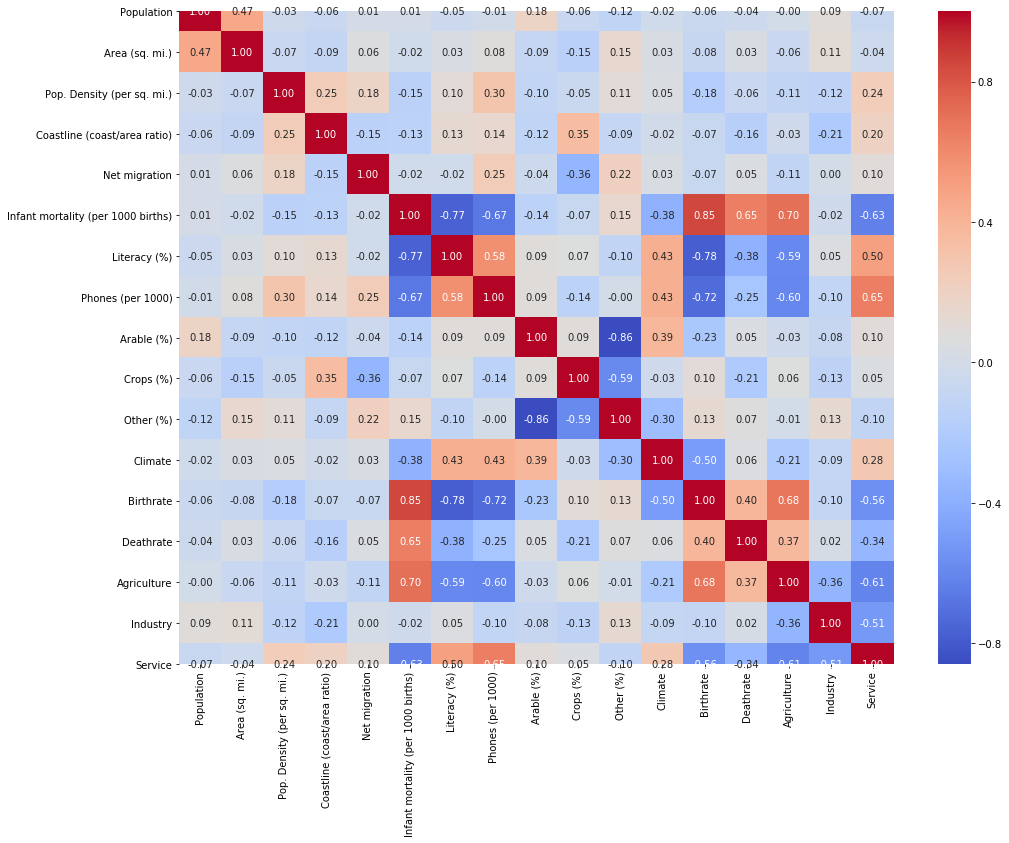

In [83]:
# The heatmap shows the correlation between all numerical columns.
plt.figure(figsize=(16,12))
sns.heatmap(data=Countries_AverageGDP_Growth.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### Modeling

In [90]:
# Focusing on positive average GDP growth.
Countries_AverageGDP_Growth = Countries_AverageGDP_Growth[~(Countries_AverageGDP_Growth
                                                            [['Avg_GDP_increase_2000_2018']] < 0).any(axis=1)]

In [92]:
# Label encode the categorical features 'Region' and 'Climate'.
LE = LabelEncoder()
Countries_AverageGDP_Growth['Region_label'] = LE.fit_transform(Countries_AverageGDP_Growth['Region_y'])
Countries_AverageGDP_Growth['Climate_label'] = LE.fit_transform(Countries_AverageGDP_Growth['Climate'])
Countries_AverageGDP_Growth.head(10)

/Users/mijia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mijia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country Code,Avg_GDP_increase_2000_2018,Country,Region_y,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,ABW,0.582967,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,...,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663,4,2
1,AFG,6.482927,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0,0
2,AGO,5.800728,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,...,0.24,97.35,2.0,45.11,24.20,0.096,0.658,0.246,9,2
3,ALB,4.369801,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,3,4
4,AND,1.639414,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,0.00,97.78,3.0,8.71,6.25,0.022,0.245,0.720,10,4
5,ARE,4.295656,United Arab Emirates,NEAR EAST,2602713,82880,31.4,1.59,1.03,14.51,...,2.25,97.15,1.0,18.96,4.40,0.040,0.585,0.375,5,0
6,ARG,2.192249,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,...,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547,4,4
7,ARM,6.516553,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,...,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418,2,5
9,ATG,2.511125,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,...,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743,4,2
10,AUS,2.956968,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,...,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700,8,0


In [93]:
# Training and testing
train, test = train_test_split(Countries_AverageGDP_Growth, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
       'Climate_label','Service']
target = 'Avg_GDP_increase_2000_2018'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [94]:
# I would like to try the linear regression model first.
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 1.3411515977552757 msle_train: 0.11442787042414207
rmse_test: 1.9111645596580504 msle_test: 0.13589345966045027


In [95]:
# Then trying some nonlinear models.
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 1.0732712185719604 msle_train: 0.07368881699660774
rmse_test: 2.012273715981313 msle_test: 0.15657278120718773


### Visualization

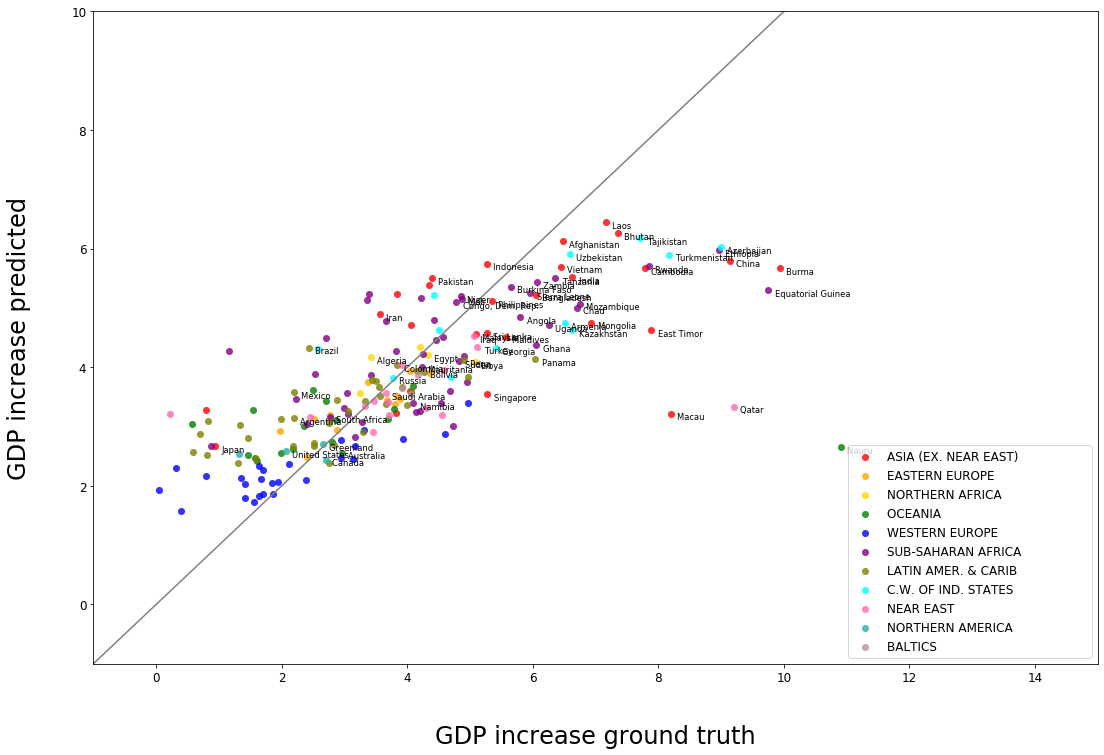

In [97]:
# Making scatter plot of prediction against ground truth by region.
plt.figure(figsize=(18,12))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = Countries_AverageGDP_Growth.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region_y']==region]
    Y = train_test_pred_Y.loc[data_shuffled['Region_y']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region) 
plt.legend(loc=4,prop={'size': 12})  

ax.set_xlabel('GDP increase ground truth',labelpad=40)
ax.set_ylabel('GDP increase predicted',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1,13,50) 
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1,15)
plt.ylim(-1,10)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Area (sq. mi.)'].iloc[i]>8e5) |
       (data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['Avg_GDP_increase_2000_2018'].iloc[i]>5)):
        plt.text(train_test_Y.iloc[i]+0.1, train_test_pred_Y.iloc[i]-0.1, label.iloc[i], size='small')

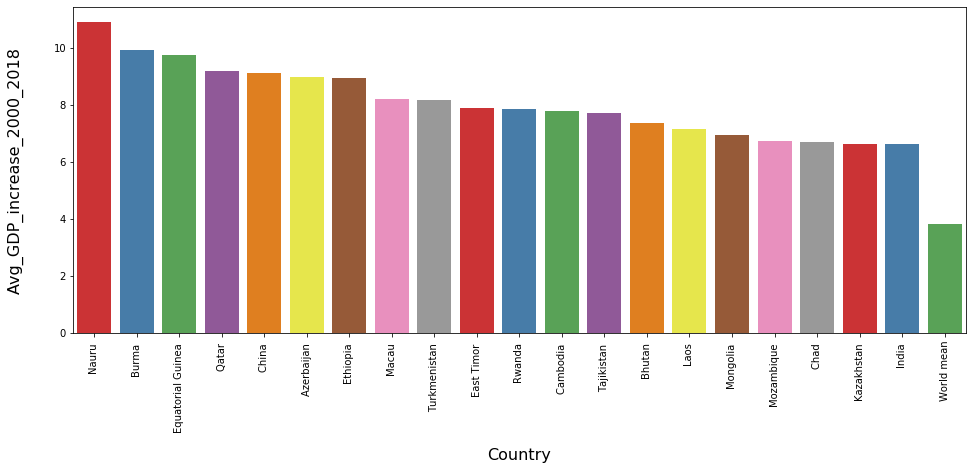

In [98]:
# Look at the top 20 countries with highest average GDP growth from 2000 to 2018. 
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = Countries_AverageGDP_Growth.sort_values('Avg_GDP_increase_2000_2018',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'Avg_GDP_increase_2000_2018':
                     [Countries_AverageGDP_Growth['Avg_GDP_increase_2000_2018'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','Avg_GDP_increase_2000_2018']],mean],ignore_index=True)
sns.barplot(x='Country', y='Avg_GDP_increase_2000_2018', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

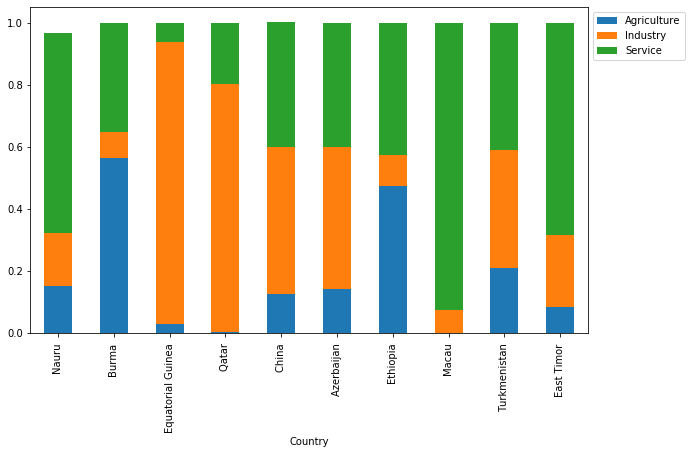

In [99]:
# Comparing the enconomy structure for the ten countries with highest average GDP growth.
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

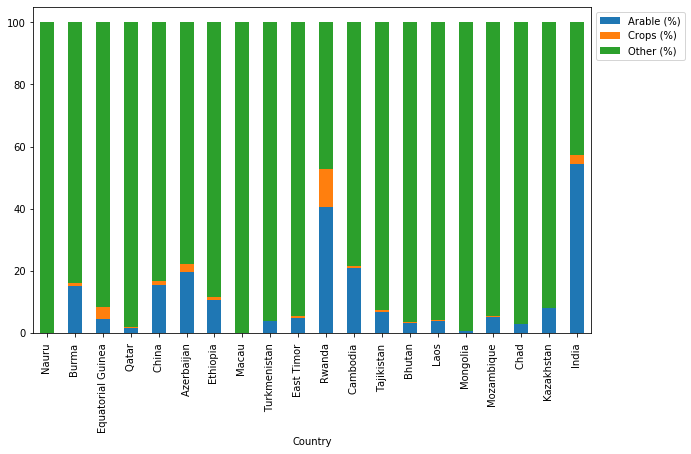

In [100]:
# Comparing the land usage for the ten countries with highest average GDP growth.
plot_data = top_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()